# Plot scalability

In [1]:
import pandas as pd
import numpy as np

In [2]:
# import plotnine
from plotnine import \
    ggplot, aes, theme, themes, element_blank, element_line, element_text, mapping, \
    geom_point, geom_jitter, geom_line, geom_bar, geom_boxplot, geom_violin, geom_histogram, \
    ggtitle, xlab, ylab, geom_vline, geom_hline, \
    scale_x_discrete, scale_y_discrete, scale_x_continuous, scale_y_continuous, \
    scale_color_discrete, scale_color_manual, scale_fill_manual, \
    xlim, ylim
from plotnine.options import figure_size


In [3]:
# plotnine theme

def theme_tufte_func(base_size=19, base_family="sans", rotate=True, figure_size=None):
    ''' Plotnine plotting theme. '''
    thm = themes.theme_bw(base_size=base_size, base_family = base_family) + \
        theme(
            legend_background = element_blank(),
            legend_key = element_blank(),
            panel_background = element_blank(),
            panel_border = element_blank(),
            strip_background = element_blank(),
            plot_background = element_blank(),
            panel_grid = element_blank(),
            axis_line = element_line(colour = "black", size = 1),
            axis_text_y = element_text(colour = "black")
        )
    if rotate:
        thm += theme(axis_text_x=element_text(rotation=45, hjust=1))
    if figure_size is not None:
        thm += theme(figure_size=figure_size)
    return thm


## Download and prep data

In [4]:
vgp_scale_path = '/Users/stephenhwang/Documents/projects/langmead_lab/omem/data/MEMO Tables - VGP scalability.csv'
hprc_scale_path = '/Users/stephenhwang/Documents/projects/langmead_lab/omem/data/MEMO Tables - HPRC scalability.csv'

vgp_scale_df = pd.read_csv(vgp_scale_path, sep=',')
hprc_scale_df = pd.read_csv(hprc_scale_path, sep=',')

In [5]:
col_names = ['Number Genomes', 'MEMO-C', 'MEMO-M', 'KMC3-C', 'KMC3-M', 'PanKmer']
vgp_scale_df.columns = col_names
hprc_scale_df.columns = col_names

In [6]:
vgp_scale_df

,Number Genomes,MEMO-C,MEMO-M,KMC3-C,KMC3-M,PanKmer
0,4,1.93,1.79,34.63,37.95,31.68
1,8,4.18,3.76,59.31,65.86,56.41
2,12,5.41,5.64,96.23,100.51,94.09
3,16,6.61,7.41,129.81,131.23,126.57


In [7]:
hprc_scale_df

,Number Genomes,MEMO-C,MEMO-M,KMC3-C,KMC3-M,PanKmer
0,9,0.34,0.33,15.41,128.19,14.57
1,18,0.59,0.59,15.85,256.31,15.58
2,27,0.80,0.81,16.21,384.42,16.54
3,36,0.95,0.97,16.48,512.58,17.39
4,45,1.13,1.16,16.79,654.98,18.36
5,54,1.31,1.36,17.11,768.88,19.36
6,63,1.51,1.57,17.43,897.07,20.40
7,72,1.74,1.94,17.68,1025.16,21.22
8,81,1.90,2.14,17.87,1153.31,22.44
9,89,2.04,2.35,18.05,1267.16,23.29


In [8]:
vgp_scale_df_melt = pd.melt(vgp_scale_df, id_vars=col_names[0], value_vars=col_names[1:], var_name='Index type')
hprc_scale_df_melt = pd.melt(hprc_scale_df, id_vars=col_names[0], value_vars=col_names[1:], var_name='Index type')

vgp_scale_df_melt['value_log2'] = np.log2(vgp_scale_df_melt['value'])
hprc_scale_df_melt['value_log2'] = np.log2(hprc_scale_df_melt['value'])

In [9]:
legend_order = ['PanKmer', 'KMC3-M', 'KMC3-C', 'MEMO-M', 'MEMO-C']
vgp_scale_df_melt['Index type'] = pd.Categorical(vgp_scale_df_melt['Index type'], legend_order, ordered=True)
hprc_scale_df_melt['Index type'] = pd.Categorical(hprc_scale_df_melt['Index type'], legend_order, ordered=True)

## Plot scalability

In [10]:
brown = '#a6611a'   
tan = '#dfc27d'     
blue = '#80cdc1'    
dark_blue = '#018571' 
purple = '#8479b7'    

names  = ['MEMO-C', 'MEMO-M', 'KMC3-C', 'KMC3-M', 'PanKmer']
colors = [blue,  dark_blue, tan, brown, purple]
color_dict = dict(zip(col_names[1:], colors))
color_dict

{'MEMO-C': '#80cdc1',
 'MEMO-M': '#018571',
 'KMC3-C': '#dfc27d',
 'KMC3-M': '#a6611a',
 'PanKmer': '#8479b7'}

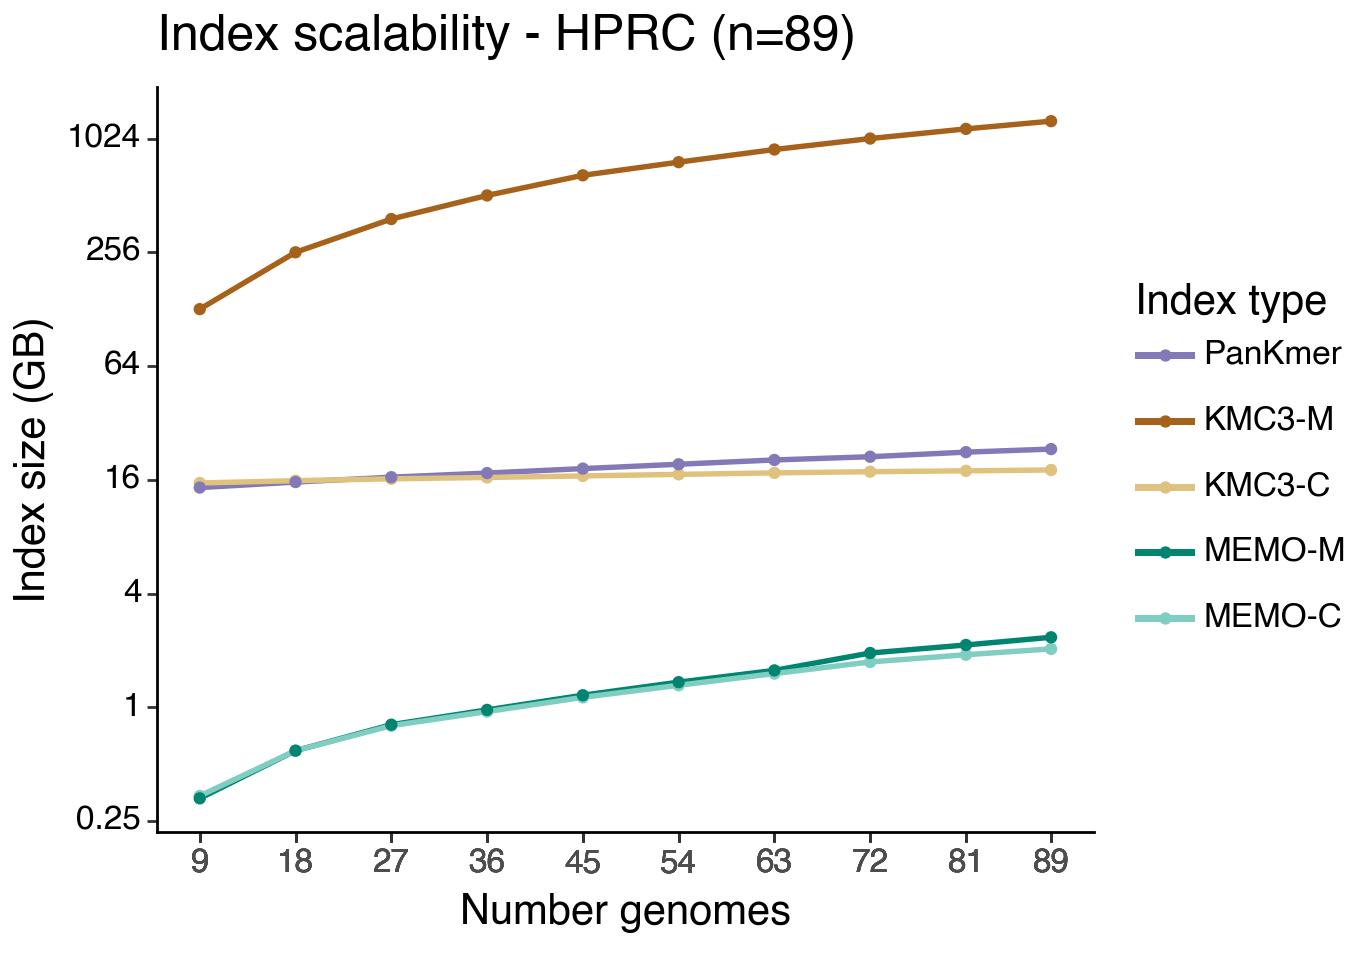

<Figure Size: (680 x 480)>

In [11]:
# HPRC scalability plot

hprc_tick_labels = [0.25, 1, 4, 16, 64, 256, 1024, 2048]
hprc_tick_pos = np.log2(hprc_tick_labels)

(
    ggplot(hprc_scale_df_melt, aes(x='Number Genomes', y='value_log2', color='Index type')) +
    geom_line(size=1.1) +
    geom_point() +
    ggtitle("Index scalability - HPRC (n=89)") +
    xlab("Number genomes") +
    ylab("Index size (GB)") +
    scale_color_manual(values=color_dict) +
    scale_x_continuous(breaks=list(hprc_scale_df_melt['Number Genomes'])) +
    scale_y_continuous(
        breaks=hprc_tick_pos,
        labels=hprc_tick_labels
    ) +
    theme_tufte_func(base_size=15, rotate=False, figure_size=(6.8,4.8))
)

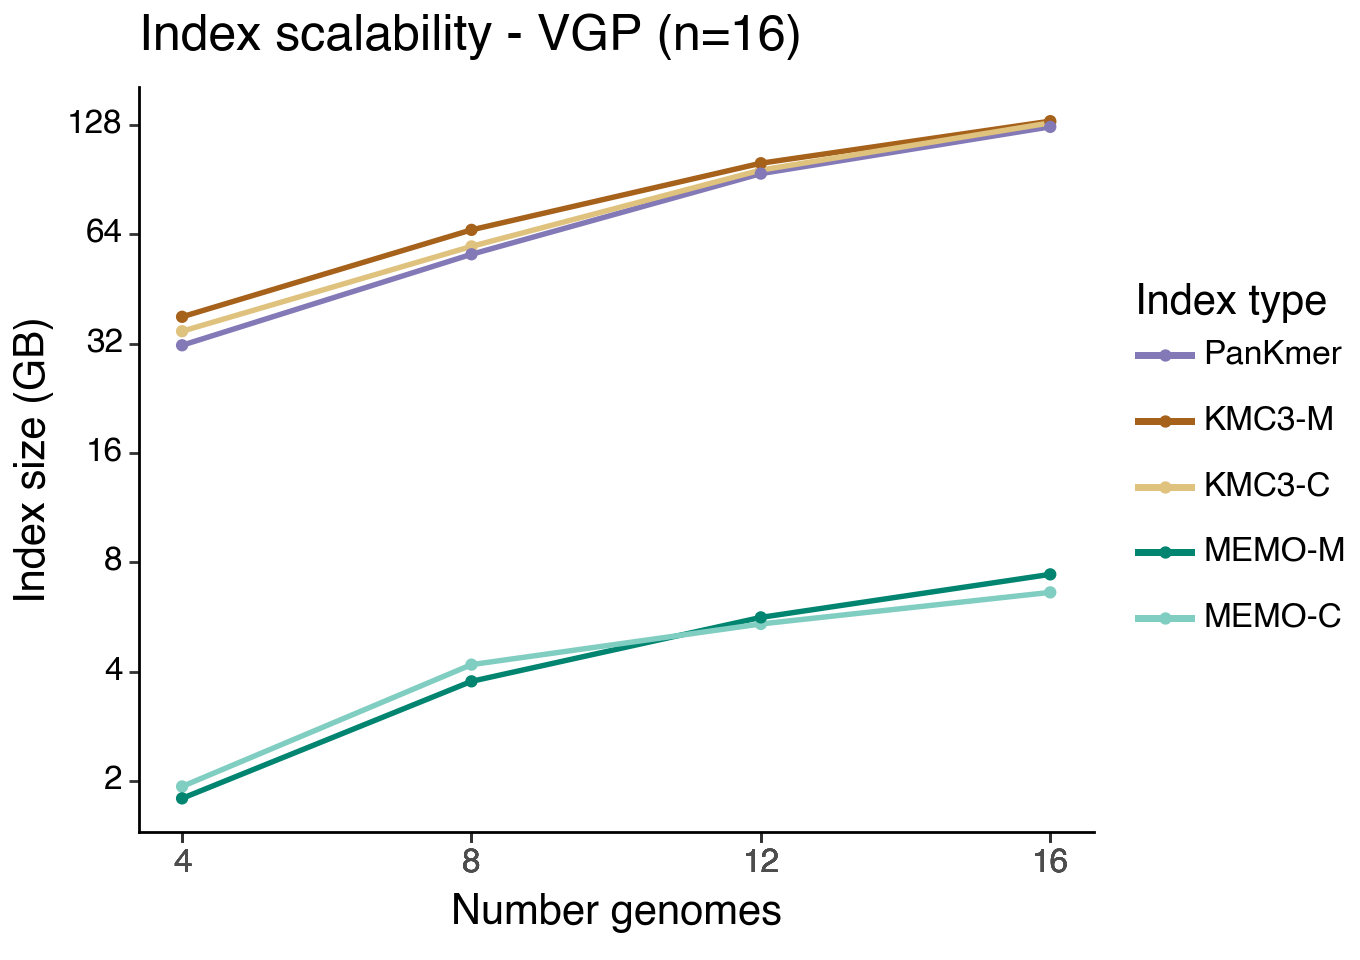

<Figure Size: (680 x 480)>

In [12]:
# VGP scalability plot

vgp_tick_labels = [1, 2, 4, 8, 16, 32, 64, 128, 256]
vgp_tick_pos = np.log2(vgp_tick_labels)

(
    ggplot(vgp_scale_df_melt, aes(x='Number Genomes', y='value_log2', color='Index type')) +
    geom_line(size=1.1) +
    geom_point() +
    ggtitle("Index scalability - VGP (n=16)") +
    xlab("Number genomes") +
    ylab("Index size (GB)") +
    scale_color_manual(values=color_dict) +
    scale_y_continuous(
        breaks=vgp_tick_pos,
        labels=vgp_tick_labels
    ) +
    scale_x_continuous(breaks=list(vgp_scale_df_melt['Number Genomes'])) +
    theme_tufte_func(base_size=15, rotate=False, figure_size=(6.8,4.8))
)